In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [2]:
data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [4]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [5]:
# Shape of the data

data.shape

(5268, 13)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5268 non-null   datetime64[ns]
 1   Time          5268 non-null   object        
 2   Location      5268 non-null   object        
 3   Operator      5268 non-null   object        
 4   Flight #      5268 non-null   object        
 5   Route         5268 non-null   object        
 6   Type          5268 non-null   object        
 7   Registration  5268 non-null   object        
 8   cn/In         5268 non-null   object        
 9   Aboard        5268 non-null   float64       
 10  Fatalities    5268 non-null   float64       
 11  Ground        5268 non-null   float64       
 12  Summary       5268 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 535.2+ KB


In [17]:
# Checking for null values

data.isnull().sum()

Date            0
Time            0
Location        0
Operator        0
Flight #        0
Route           0
Type            0
Registration    0
cn/In           0
Aboard          0
Fatalities      0
Ground          0
Summary         0
dtype: int64

In [12]:
# Filling the null values

data["Aboard"] = data["Aboard"].fillna(data["Aboard"].mean())
data["Fatalities"] = data["Fatalities"].fillna(data["Fatalities"].mean())
data["Ground"] = data["Ground"].fillna(data["Ground"].mean())

In [16]:
for column in data.columns:
    data[column] = data[column].fillna("N/A")
    

In [24]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Month
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,N/A,Demonstration,Wright Flyer III,N/A,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,N/A,Test flight,Dirigible,N/A,N/A,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7
2,1913-08-06,N/A,"Victoria, British Columbia, Canada",Private,-,N/A,Curtiss seaplane,N/A,N/A,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,N/A,N/A,Zeppelin L-1 (airship),N/A,N/A,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,9
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,N/A,N/A,Zeppelin L-2 (airship),N/A,N/A,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10


In [19]:
# Changing data type of date column

data["Date"] = pd.to_datetime(data["Date"])

In [21]:
# Creating a year column

data["Year"] = data["Date"].dt.year

In [23]:
# Creating month column

data["Month"] = data["Date"].dt.month

<Axes: xlabel='Year'>

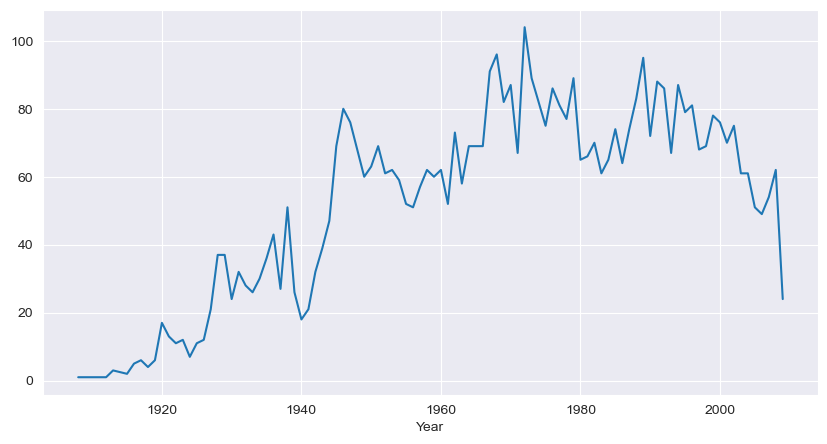

In [27]:
# Year wise total accidents

data.groupby("Year")["Year"].count().plot()

In [28]:
mmap = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"June",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

In [29]:
data["Month"] = data["Month"].map(mmap)

In [30]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Month
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,N/A,Demonstration,Wright Flyer III,N/A,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,Sep
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,N/A,Test flight,Dirigible,N/A,N/A,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,July
2,1913-08-06,N/A,"Victoria, British Columbia, Canada",Private,-,N/A,Curtiss seaplane,N/A,N/A,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,Aug
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,N/A,N/A,Zeppelin L-1 (airship),N/A,N/A,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,Sep
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,N/A,N/A,Zeppelin L-2 (airship),N/A,N/A,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,Oct


<Axes: xlabel='Month'>

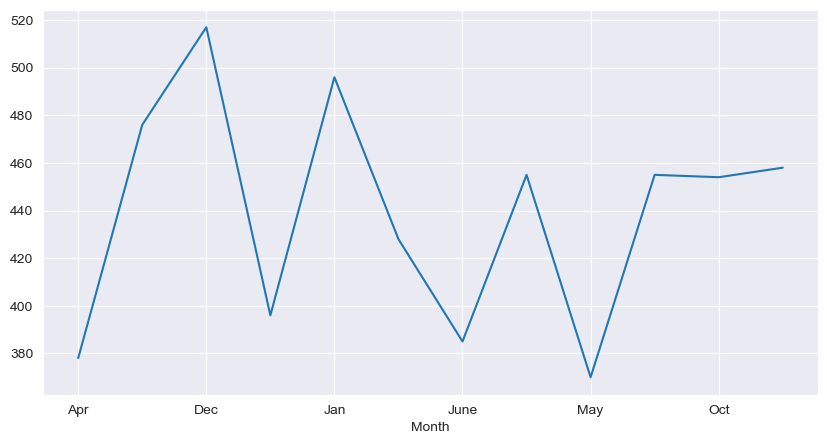

In [33]:
# Month wise total accidents

data.groupby("Month")["Month"].count().plot()

In [36]:
# Operators who experienced the most number of accidents

o = data["Operator"].value_counts().head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Aeroflot'),
  Text(1, 0, 'Military - U.S. Air Force'),
  Text(2, 0, 'Air France'),
  Text(3, 0, 'Deutsche Lufthansa'),
  Text(4, 0, 'Air Taxi'),
  Text(5, 0, 'China National Aviation Corporation'),
  Text(6, 0, 'United Air Lines'),
  Text(7, 0, 'Military - U.S. Army Air Forces'),
  Text(8, 0, 'Pan American World Airways'),
  Text(9, 0, 'Military - U.S. Navy')])

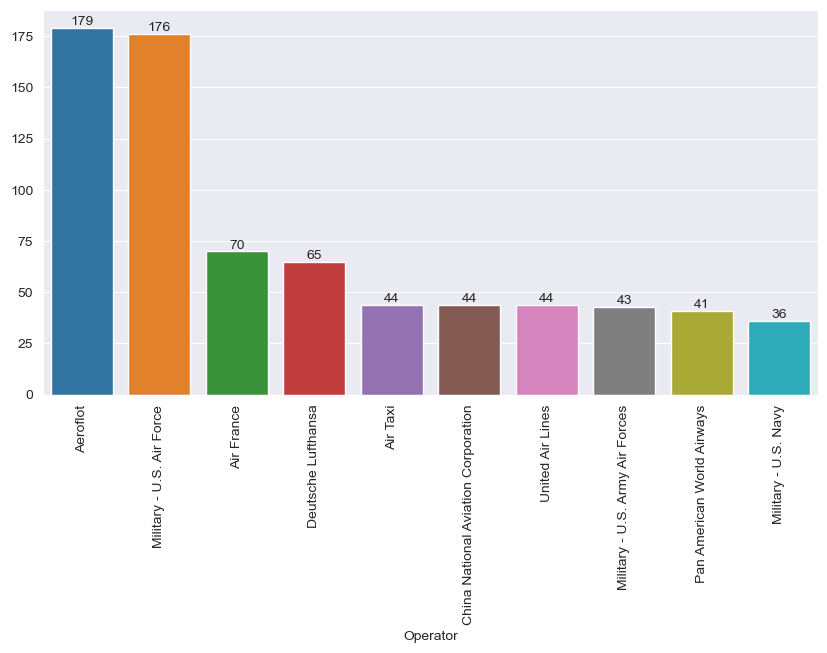

In [42]:
ax = sns.barplot(x = o.index, y = o.values)

for bars in ax.containers:
        ax.bar_label(bars)
        
plt.xticks(rotation = 90)

In [44]:
r = data[data["Route"]!="N/A"]

In [47]:
# Top 10 routs where the most accidents were caused

route = r["Route"].value_counts().head(10)

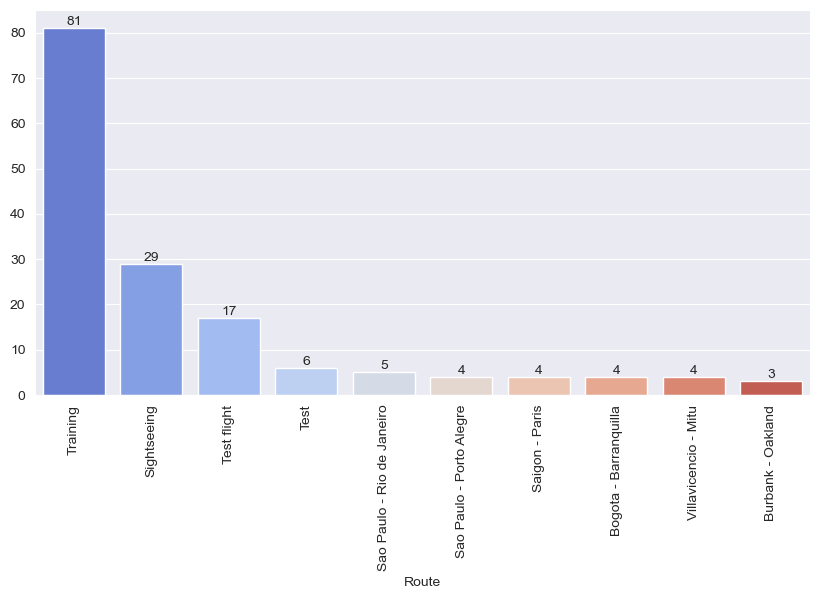

In [52]:
ax = sns.barplot(x = route.index,y = route.values, palette = "coolwarm")

plt.xticks(rotation = 90)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Operator'>

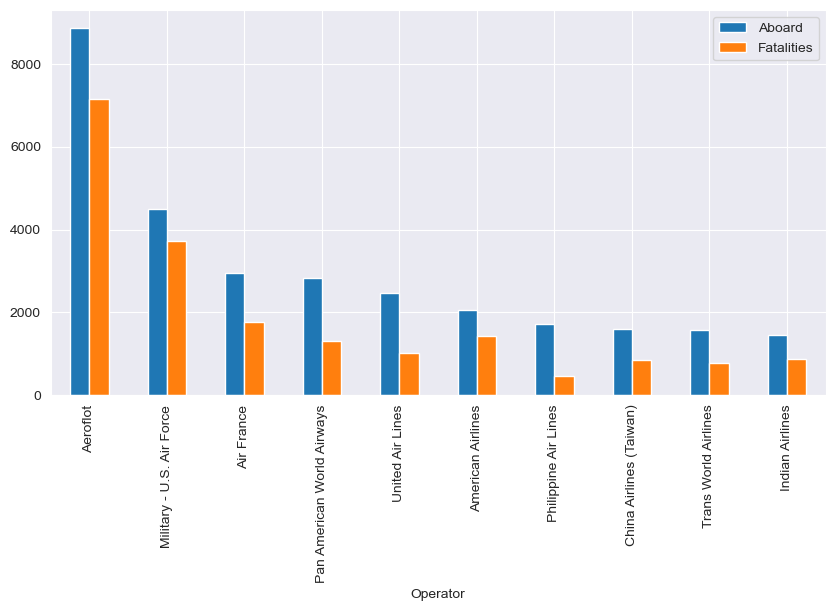

In [67]:
# Operator (on-board vs fatalities)

round(data.groupby("Operator")[["Aboard", "Fatalities"]].sum(),0).sort_values(by=["Aboard", "Fatalities"], ascending=False).head(10).plot(kind = "bar", stacked = False)




In [68]:
data.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary',
       'Year', 'Month'],
      dtype='object')

<Axes: xlabel='Type'>

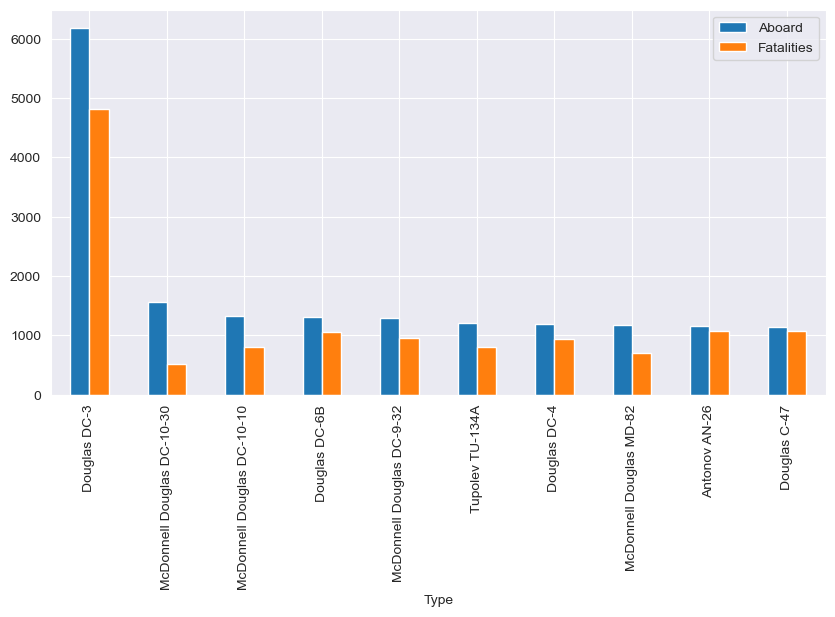

In [69]:
# Type (Aboard vs Fatalities)

round(data.groupby("Type")[["Aboard", "Fatalities"]].sum(),0).sort_values(by=["Aboard", "Fatalities"], ascending=False).head(10).plot(kind = "bar", stacked = False)

In [71]:
t = data[data["Time"]!="N/A"]

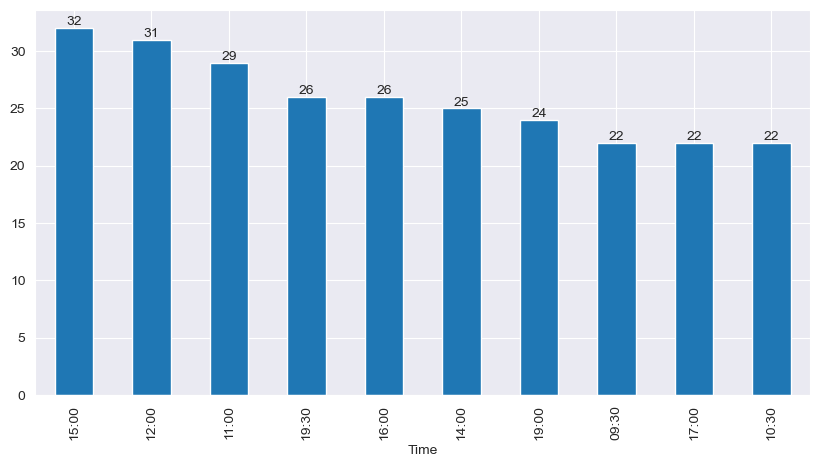

In [75]:
# Time when most of the accidents took place

ax = t["Time"].value_counts().head(10).plot(kind = "bar")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Aboard', ylabel='Fatalities'>

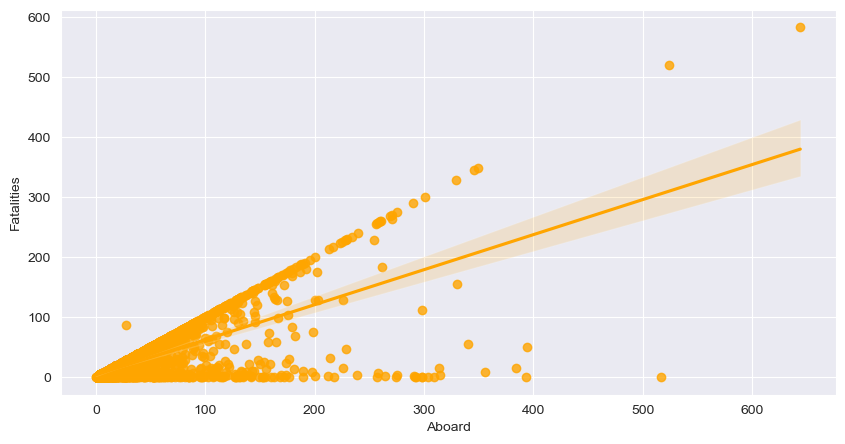

In [78]:
# Relation between Aboard and Fatalities

sns.regplot(x = data["Aboard"], y = data["Fatalities"], color = "orange")

Last words before crash

In [79]:
df= pd.read_csv("Last_worlds_2022_11_13.csv")

In [80]:
df

,Date,Airlane,Flight_number,Last_words
0,07 Jul 1962,Alitalia,771,"Unable to make out your last message, will you..."
1,07 May 1964,Pacific Air Lines,773,Skipper's shot! We've been shot. I was trying...
2,08 Nov 1965,American Airlines,383,Have you still got the runway OK? Ah .. just b...
3,30 Jun 1967,Thai International,601,I have no radar contact with you.
4,06 Nov 1967,Trans World Airlines,159,Not very # far off the runway. Sure as # isn't.
...,...,...,...,...
81,01 Jun 2009,Air France,447,"Damn it, we're going to crash... This can't be..."
82,17 JuL 2007,Tam,3054,"Oh my god, oh my god"
83,15 Jan 2009,US Airways,1549,We're gonna be in the Hudson.
84,12 Feb 2009,Continental Express,3407,We're down.


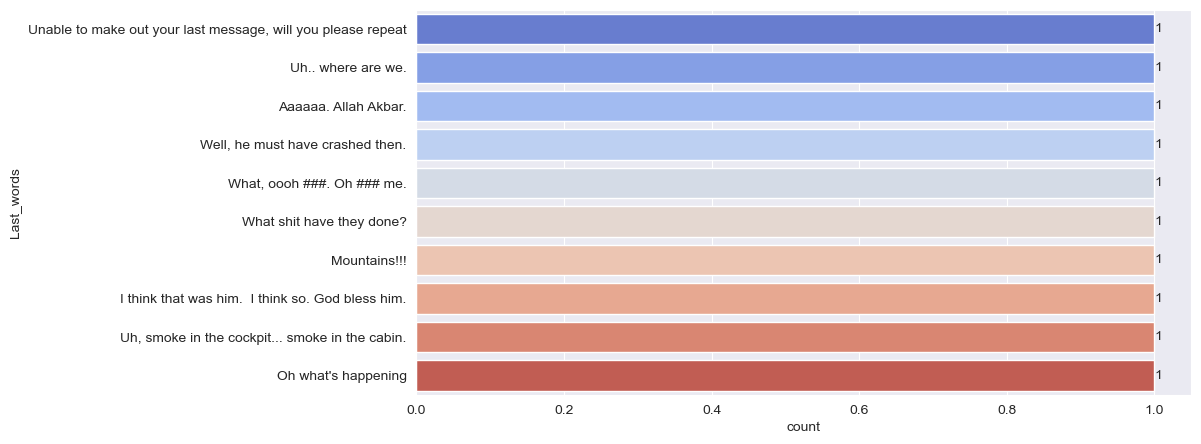

In [85]:
# Most used words before accident

w = df["Last_words"].value_counts().head(10)

ax = sns.countplot(y = "Last_words", data = df, order = w.index, palette = "coolwarm")

for bars in ax.containers:
    ax.bar_label(bars)

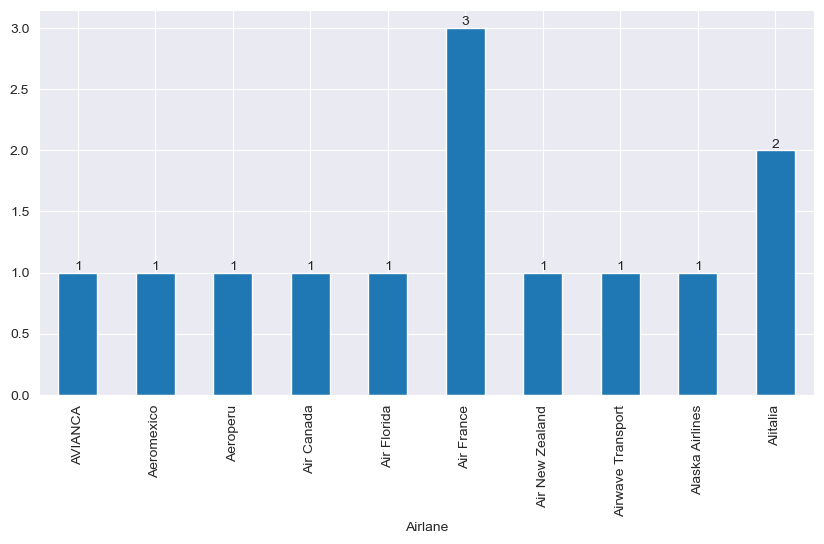

In [92]:
# Most used last words by the operators

ax = df.groupby("Airlane")["Last_words"].count().head(10).plot(kind = "bar")

for bars in ax.containers:
    ax.bar_label(bars)